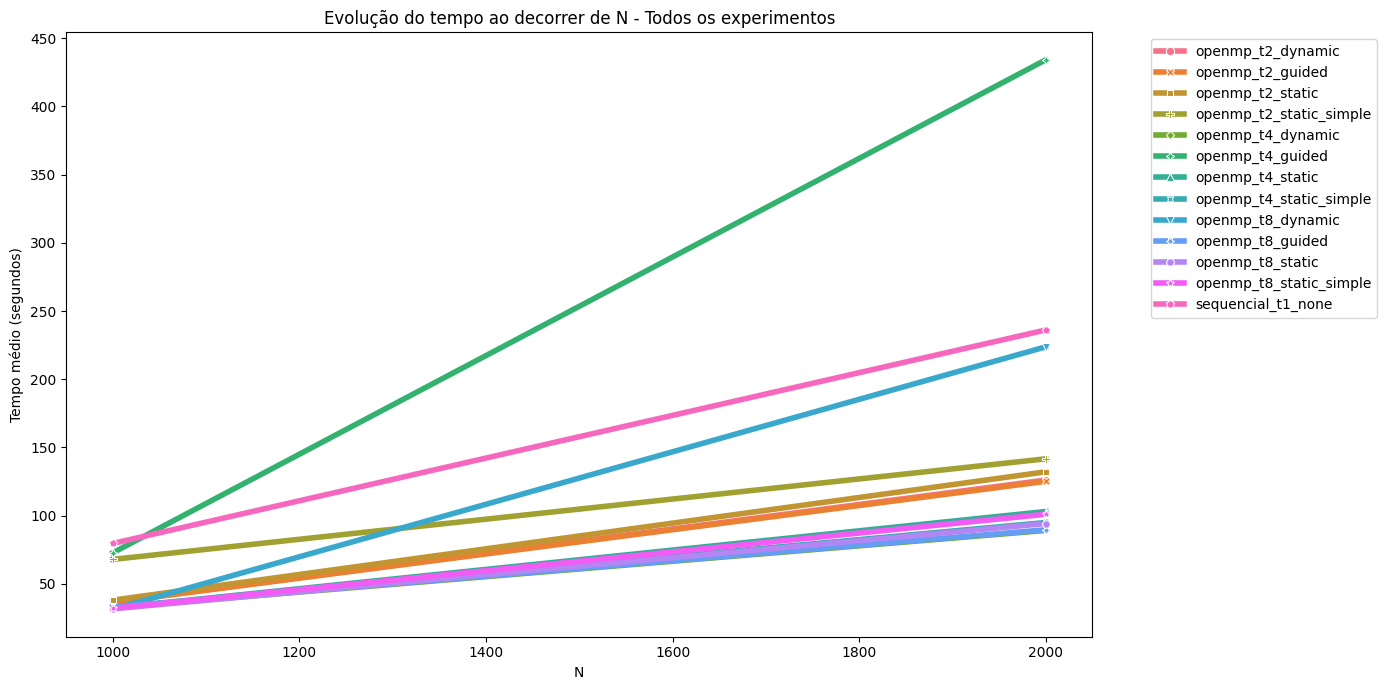

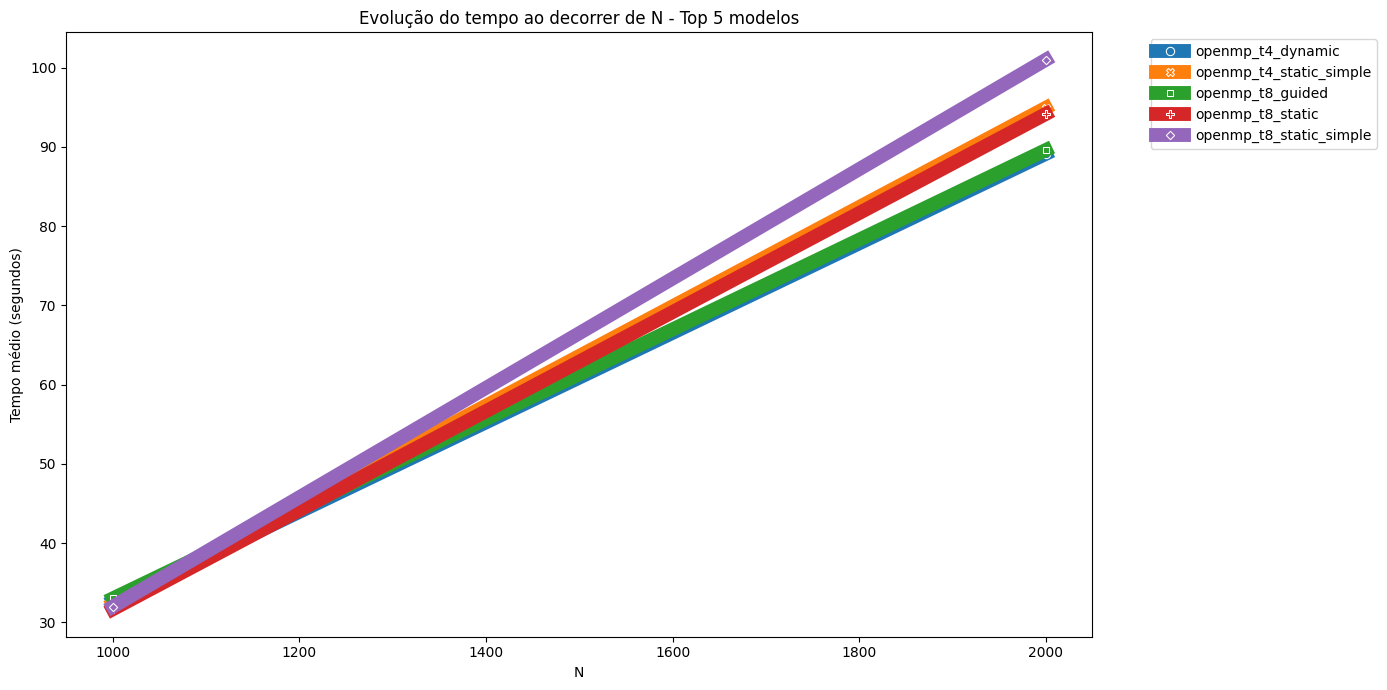

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_1000 = pd.read_csv(r'benchmarks\resultados_1000.csv')
data_2000 = pd.read_csv(r'benchmarks\resultados_2000.csv')

data_1000["N"] = 1000
data_2000["N"] = 2000

df = pd.concat([data_1000, data_2000], ignore_index=True)

#calcula tempo médio por combinação de parametros e N
grouped = df.groupby(["config", "threads", "schedule", "N"])["time_seconds"].mean().reset_index()

#cria chave única para cada combinação
grouped["modelo"] = (grouped["config"] + "_t" + grouped["threads"].astype(str) + "_" + grouped["schedule"])

#todos os experimentos
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped, x="N", y="time_seconds",hue="modelo", style="modelo", linewidth=4, markers=True, dashes=False)
plt.title("Evolução do tempo ao decorrer de N - Todos os experimentos")
plt.ylabel("Tempo médio (segundos)")
plt.xlabel("N")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

#top 5 modelos devido a visualização prejudicada
top_models = (grouped[grouped["N"] == grouped["N"].max()].sort_values("time_seconds").head(5)["modelo"].unique())

top_grouped = grouped[grouped["modelo"].isin(top_models)]

plt.figure(figsize=(14, 7))
sns.lineplot(data=top_grouped, x="N", y="time_seconds", hue="modelo", style="modelo", linewidth=10, markers=True,  dashes=False)
plt.title("Evolução do tempo ao decorrer de N - Top 5 modelos")
plt.ylabel("Tempo médio (segundos)")
plt.xlabel("N")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
